## Problem Statement :
**Predicting MPG using KNN, Linear Regression and Decision Tree Model.**

In [10]:
# importing required libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor  

In [2]:
# reading cars data
cars = pd.read_csv("cars.csv")

In [3]:
# assigning predictors and value to be predicted to variables
X = cars[["Cylinders","Weight","Horsepower"]]
y = cars['MPG']

In [4]:
# splitting the model as test data and train data.
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 100)

### 1.Finding k value using CV

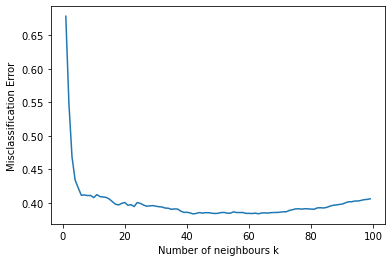

best K value : 41


In [5]:
from sklearn.neighbors import KNeighborsRegressor
# choosing cross validation to finalize K 
neighbours = list(range(1,100))

# list to store all the cv scores for every k value
cv_scores = []

# performing 9 fold cross validation
for k in neighbours:
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn,X_train,y_train, cv = 9,scoring= 'r2')
    cv_scores.append(scores.mean())

# finding the error from accuracy
Error = [1 - x for x in cv_scores]

# plotting error with the respective KNN
plt.plot(neighbours,Error)
plt.xlabel("Number of neighbours k")
plt.ylabel("Misclassification Error")
plt.show()
# Finding min k value.

# finding the mininum error value and finding its respective index so that it is the k value.
mini = 11111111111111111111111111111111111111111111111111111111111111111111111111111111111111
for i in Error:   # iterating for every value in Error.
    if i < mini:  # comparing whether the value less than the value in min or not. 
        mini = i  # If the value is less than mini assigning the value to mini.
k = Error.index(mini)  # finding the inde of the minimum value generated from the previous for loop.
print("best K value :",k)

**We have determined the error for every value of k from 1 to 100 and stored in a list. Then identified the least value of error and the resepctive k value. From the above we can see that least k value is 41**

### KNN

In [6]:
# Loading library
from sklearn.neighbors import KNeighborsRegressor   # importing KNN regressor using sklearn
     
knn = KNeighborsRegressor(n_neighbors=41)           # assigning KNN model to a variable
score1 = cross_val_score(knn,X_train,y_train, cv = 15,scoring= 'neg_mean_squared_error') # finding cv scores for all the folds using cross validation
print("CV score for 41NN model :",score1.mean())                                         # finding mean of folds.

CV score for 41NN model : -30.243975961120324


**Performed KNN on the model with the k value which is determined in the previous step. Used scoring parameter as negative mean squared error to determine the CV score of 15 folds. Compare this CV score with the other two models(Higher the value, best is the model)**

### 2.Linear Regression

In [7]:
from sklearn.linear_model import LinearRegression            # importing linear regression using sklearn
regressor = LinearRegression(fit_intercept=True)             # assigning linear regression model to a variable by including intercept
score2 = cross_val_score(regressor,X_train,y_train, cv = 15,scoring= 'neg_mean_squared_error') # finding cv scores for all the folds using cross validation
print("CV score for Linear Regression model :",score2.mean())                                  # finding mean of folds.

CV score for Linear Regression model : -30.794303129051595


**Performed Linear Regression on the model using sklearn. Used scoring parameter as negative mean squared error to determine the CV score of 15 folds. Compare this CV score with the other two models(Higher the value, best is the model)**

### 3.Decision Tree

In [12]:
clf = DecisionTreeRegressor()                                               # assigning decision regressor object
parameters={'max_depth' : range(2,30,2),'min_samples_leaf': range(2,30,2)}  # parameters to be tuned
grid = GridSearchCV(clf,param_grid=parameters,cv =10,n_jobs=-1)             # fitting grid searchCV to find the best paramters
grid.fit(X_train,y_train)                                                   # fitting the gridserach CV 
grid.best_estimator_                                                        # printing the tuned hyper parameters

DecisionTreeRegressor(max_depth=4, min_samples_leaf=6)

In [14]:
from sklearn.tree import DecisionTreeRegressor                   # importing regressor decision tree using sklearn
model = DecisionTreeRegressor(max_depth=4,min_samples_leaf=6)    # assigning decision tree model to a variable using the tuned hyper paameters
score3 = cross_val_score(model,X_train,y_train, cv = 15,scoring= 'neg_mean_squared_error')  # finding cv scores for all the folds using cross validation
print("CV score for Decision Tree model :",score3.mean())                                   # finding mean of folds.

CV score for Decision Tree model : -31.912356190044402


**Performed Decision Tree on the model using skelarn. Used scoring parameter as negative mean squared error to determine the CV score of 15 folds. Compare this CV score with the other two models(Higher the value, best is the model)**

### 4. Choosing best competing model for testing

**Now compare all the CV scores:**

***41NN model : -30.243975961120324***

***Linear Regression model : -30.794303129051595***
  
***Decision Tree model : -31.912356190044402***
  
**We can clearly see that 41NN model has the highest value which is the best CV score. So KNN should be preferred here.** 

### 5. Testing the models and reporting best performing model.

In [15]:
from sklearn.neighbors import KNeighborsRegressor   # importing KNN regressor using sklearn
from sklearn.metrics import mean_squared_error      # importing mean_squared error using sklearn
      
knn_test = KNeighborsRegressor(n_neighbors=41)      # assigning KNN model to a variable
knn_test.fit(X_train,y_train)                       # fitting the model.    
y_pred = knn_test.predict(X_test)                   # finding the predicted values.
MSE_1 = (np.transpose(y_test-y_pred) @ (y_test - y_pred))/len(y_pred)   # finding mean squared error value for the model.
print("MSE for 41NN :",MSE_1)
# or
# mean_squared_error(y_test, y_pred)

MSE for 41NN : 15.866611648023719


In [16]:
from sklearn.linear_model import LinearRegression            # importing linear regression using sklearn
regressor = LinearRegression(fit_intercept=True)             # assigning linear regression model to a variable
regressor.fit(X_train,y_train)                               # fitting the model.
y_pred = regressor.predict(X_test)                           # finding the predicted values.
MSE_2 = (np.transpose(y_test-y_pred) @ (y_test - y_pred))/len(y_pred)  # finding mean squared error value for the model.
print("MSE for Linear Regression :",MSE_2)
# or
# mean_squared_error(y_test, y_pred)

MSE for Linear Regression : 17.115037508636515


In [17]:
from sklearn.tree import DecisionTreeRegressor                   # importing regressor decision tree using sklearn
model = DecisionTreeRegressor(max_depth=4,min_samples_leaf=6)    # assigning decision tree model to a variable
model.fit(X_train,y_train)                                       # fitting the model.
y_pred = model.predict(X_test)                                   # finding the predicted values.
MSE_3 = (np.transpose(y_test-y_pred) @ (y_test - y_pred))/len(y_pred)   # finding mean squared error value for the model.
print("MSE for Decision Tree :",MSE_3)
# or
# mean_squared_error(y_test, y_pred)

MSE for Decision Tree : 16.089505475425973


**From testing the models we can see that MSE of 41NN model is the lowest value. So 41NN is the best performing the model in this case.**

## Report

- Initially we have determined the CV scores for all the k values and determined the errors for all the values.
- Then we have finalized the k value by finding out the minimum error value and respective k value.
- With the determined k value, CV score by using negative mean squared error is calculated.
- For Linear Regression, CV score by using negative mean squared error is calculated.
- For Decision Tree, CV score by using negative mean squared error is calculated.
- After comparing all the CV scores 41NN gave the best value.
- Fitted 41NN model and tested the model with X_test and predicted y_pred. MSE is determined by using y_pred and y_test.
- Now for testing purpose tried to test the other models as well.
- Fitted Lienar Regression model and tested the model with X_test and predicted y_pred. MSE is determined by using y_pred and y_test.
- Fitted Decision Tree model and tested the model with X_test and predicted y_pred. MSE is determined by using y_pred and y_test.
- MSE for **41NN** gave the **best MSE value**, so it is finalized and reported as **best model.**